## POSTTEST 6(UNSUPERVISED LEARNING)

## IMPORT PACKAGE
- Pandas
- Numpy
- Matplotlib
- Seaborn
- Scikit-learn(Sklearn)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete

import warnings
warnings.filterwarnings('ignore')

## Record File("tangsel_covid19.csv")

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Info Dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Akses Dataframe

In [4]:
df_Iris = df.loc[:]
df_Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## K-MEAN CLUSTERING
Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam clustering dengan pendekatan partitional. Setiap cluster berhubungan dengan centroid (point tengah). Setiap point dimasukkan pada cluster dengan centroid terdekat. Pada algoritma ini nilai K == cluster harus ditentukan. 
Centroid pada umumnya dipilih secara random. Biasanya centroid merupakan rata-rata dari point pada cluster. Untuk menentukan setiap data point masuk ke cluster mana, digunakan pengukuran kedekatan(jarak) dengan Euclidean distance, cosine similarity, korelasi, dan lain sebagainya. 

In [5]:
model = KMeans(n_clusters=3)

df_Iris["Species"] = df_Iris.Species
points = df_Iris[["SepalLengthCm","PetalLengthCm"]]

model.fit(points)

labels = model.labels_ 

print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


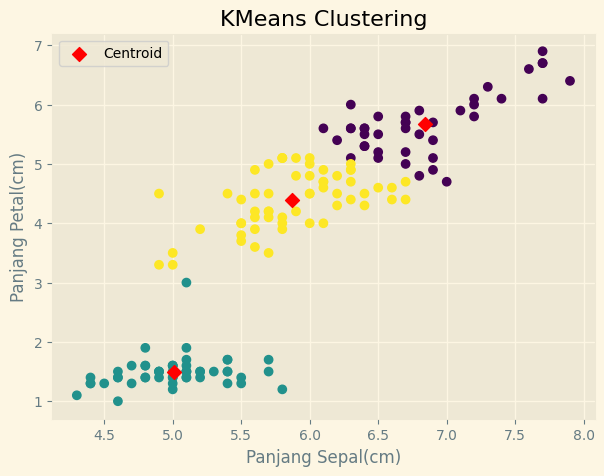

In [6]:
plt.style.use('Solarize_Light2')

ctr = model.cluster_centers_

ctr_x = ctr[:,0]
ctr_y = ctr[:,1]

plt.figure(1, figsize=(7,5))
plt.scatter(points["SepalLengthCm"], points["PetalLengthCm"], alpha=1, c=labels)
plt.scatter(ctr_x, ctr_y, marker="D", s=50, label="Centroid", c='red')

plt.title("KMeans Clustering")
plt.xlabel("Panjang Sepal(cm)")
plt.ylabel("Panjang Petal(cm)")
plt.legend()

plt.show()

In [7]:
dsk_Iris = pd.DataFrame({"labels": labels,"country": df_Iris.Species})
ct_Iris = pd.crosstab(dsk_Iris["labels"], dsk_Iris["country"])
ct_Iris

country,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,0,4,37
1,50,1,0
2,0,45,13


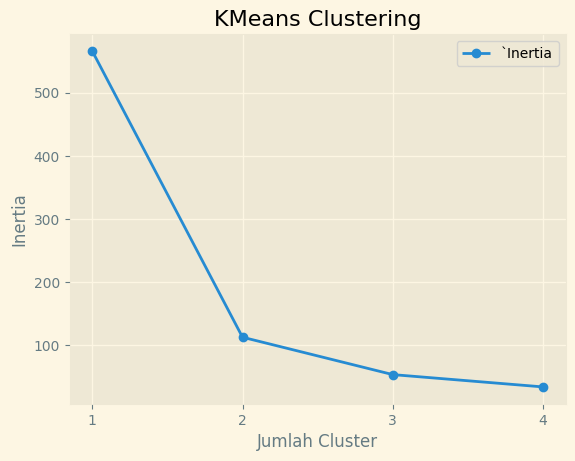

In [8]:
cluster_sum = range(1,5)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters=cluster)
    model.fit(points)
    inertia.append(model.inertia_)
    
plt.plot(cluster_sum, inertia, '-o', label="`Inertia")
plt.xticks(cluster_sum)

plt.title("KMeans Clustering")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.legend()

plt.show()

## HIERARCHICAL CLUSTERING
Algoritma ini menghasilkan sekumpulan cluster bersarang dalam bentuk hirarki pohon. Algoritma ini dapat divisualisasikan menggunakan dendogram atau bubble. Algoritma ini tidak harus menentukan jumlah cluster. Jumlah cluster yang diinginkan didapatkan dengan memotong dendogram pada level yang tepat. 

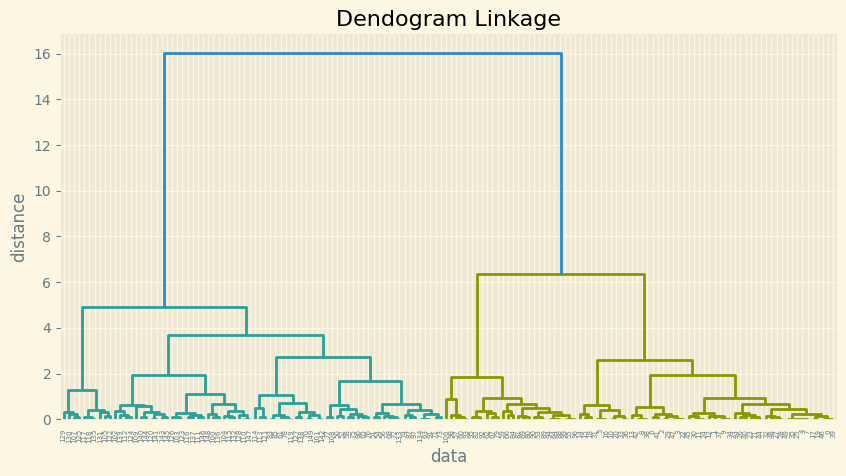

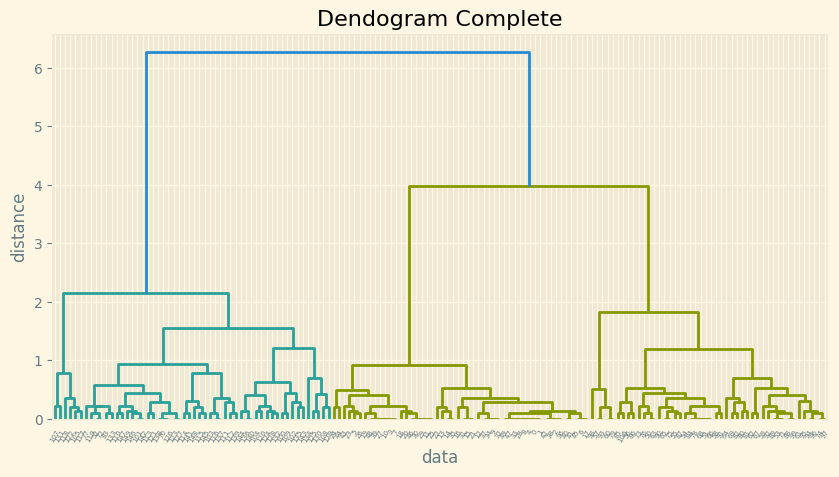

In [9]:
points_linkage = df_Iris.iloc[:,[4,1,]].values
points_complete = df_Iris.iloc[:,[4,3,]].values

hr_linkage = linkage(points_linkage, method='ward')
hr_complete = complete(points_complete)

# Visualisasi hasil model Dendogram Linkage
plt.figure(1, figsize=(10, 5))
dendrogram(hr_linkage)
plt.title('Dendogram Linkage')
plt.xlabel('data')
plt.ylabel('distance')

# Visualisasi hasil model Dendogram Complete
plt.figure(2, figsize=(10, 5))
dendrogram(hr_complete)
plt.title('Dendogram Complete')
plt.xlabel('data')
plt.ylabel('distance')
plt.xticks(rotation=60)

plt.show()

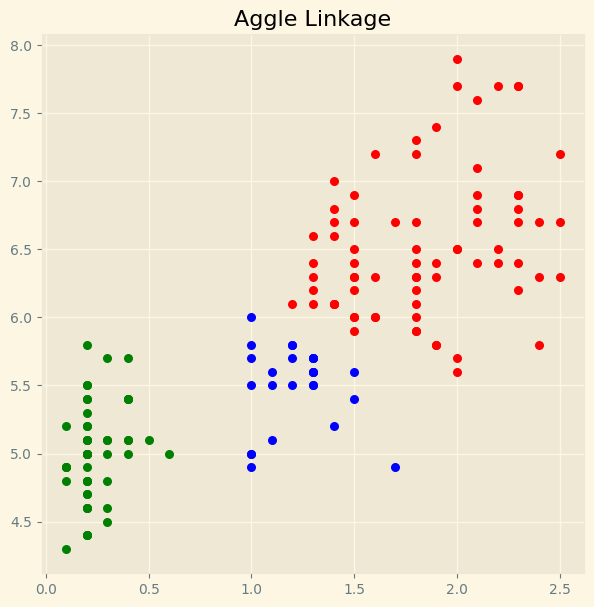

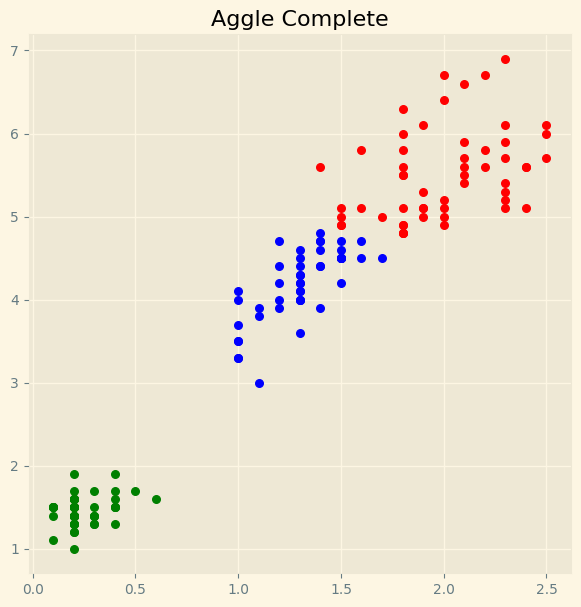

In [10]:
ag_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_complete.fit_predict(points_complete)

# Visualisasi hasil model Aggle Linkage
plt.figure(1, figsize=(7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], s=30, c='red')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], s=30, c='green')
plt.scatter(points_linkage[pr_linkage==2,0], points_linkage[pr_linkage==2,1], s=30, c='blue')
plt.title('Aggle Linkage')

# Visualisasi hasil model Aggle Complete
plt.figure(2, figsize=(7,7))
plt.scatter(points_complete[pr_complete==0,0], points_complete[pr_complete==0,1], s=30, c='red')
plt.scatter(points_complete[pr_complete==1,0], points_complete[pr_complete==1,1], s=30, c='green')
plt.scatter(points_complete[pr_complete==2,0], points_complete[pr_complete==2,1], s=30, c='blue')
plt.title('Aggle Complete')

plt.show()